In [11]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2      

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [14]:
from proj1_helpers import *

#Pensez à retirer 'fermeli' du path
DATA_TRAIN_PATH = '/home/ML_course/projects/project1/data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

def clean_data(tX):
    #replace -999 by the mean of the valid features of the column
    tX[tX == -999] = np.NaN
    mean = np.nanmean(tX,axis=0)
    inds = np.where(np.isnan(tX))    
    tX[inds]= np.take(mean, inds[1])
    
    #standardize features 
    std= np.std(tX,axis=0)
    newMean = np.nanmean(tX,axis=0)
    
    return (tX-newMean)/std

tX = clean_data(tX)
print("finished")



finished


## Do your thing crazy machine learning thing here :) ...

In [32]:

def cross_validation_visualization(lambds, mse_tr, mse_te):
    print("inside the vizualisation function")
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(lambds, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, mse_te, marker=".", color='r', label='test error')
    plt.xlabel("lambda")
    plt.ylabel("rmse")
    plt.xlim(1e-4, 1)
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")


def bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te):
    """visualize the bias variance decomposition."""
    rmse_tr_mean = np.expand_dims(np.mean(rmse_tr, axis=0), axis=0)
    rmse_te_mean = np.expand_dims(np.mean(rmse_te, axis=0), axis=0)
    plt.plot(
        degrees,
        rmse_tr.T,
        linestyle="-",
        color=([0.7, 0.7, 1]),
        linewidth=0.3)
    plt.plot(
        degrees,
        rmse_te.T,
        linestyle="-",
        color=[1, 0.7, 0.7],
        linewidth=0.3)
    plt.plot(
        degrees,
        rmse_tr_mean.T,
        'b',
        linestyle="-",
        label='train',
        linewidth=3)
    plt.plot(
        degrees,
        rmse_te_mean.T,
        'r',
        linestyle="-",
        label='test',
        linewidth=3)
    plt.xlim(1, 9)
    plt.ylim(0.2, 0.7)
    plt.xlabel("degree")
    plt.ylabel("error")
    plt.legend(loc=1)
    plt.title("Bias-Variance Decomposition")
    plt.savefig("bias_variance")


just before the visualization function call
[0.3900137598433009, 0.3900137422626319, 0.390013743827957, 0.39001379419807153, 0.39001395358749874, 0.3900143406973011, 0.3900151845774912, 0.3900169196383554, 0.3900203569342425, 0.39002698674662506, 0.39003949905046775, 0.39006264690440007, 0.3901046076883091, 0.3901789758148999, 0.39030736410584466, 0.39052218843071357, 0.3908685244740736, 0.39140321974730274, 0.392189482830432, 0.3932869159033533, 0.3947403770646348, 0.39657401710373963, 0.39879620038195, 0.40141595195470353, 0.4044648664623516, 0.40801379105792, 0.4121730318876389, 0.4170689254310312, 0.4227983791569605, 0.42937468068450485]
[0.3899036678172342, 0.38990371747066044, 0.3899038109298132, 0.3899039866642678, 0.38990431665085057, 0.3899049351330188, 0.3899060914182595, 0.3899082458428653, 0.3899122418534706, 0.3899196089454732, 0.3899330826369471, 0.3899574660269559, 0.39000098736801125, 0.39007728693851373, 0.39020801052839293, 0.39042558532290295, 0.3907750700483024, 0.3

'print("starting log reg")\n_,w = np.squeeze(logistic_regression(y, tX, np.zeros((tX.shape[1], 1)), 10000, 0.01))\nlabels = classify_with_threshold(0.5,tX,w)\nprint(accuracy(y,labels))\n#print(len(tX))\nprint("ending log reg")'

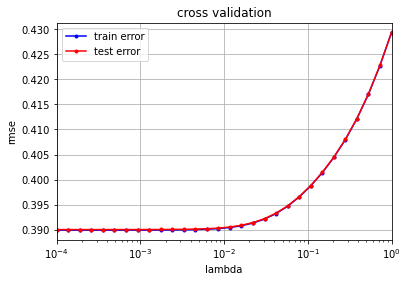

In [38]:
def calculate_mse(e):
   return 1/2*np.mean(e**2)


def compute_gradient(y, tx, w):
    err = y - tx.dot(w)
    grad = -tx.T.dot(err) / len(err)
    return grad, err



############################### Linear regression with gradient descent################################   

def least_squares_GD(y, tx, initial_w, max_iters, gamma):
    ws = [initial_w]
    y= y.reshape(y.shape[0],1)
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        grad, err = compute_gradient(y, tx, w)
        loss = calculate_mse(err)
        w = w - gamma * grad
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}, w1={w1}, w1={w1}".format(
        bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws
#least_squares_GD(y, tX, np.full((30,1),0.00001), 100, 0.001)


######## least squares ##################################################################################
def least_square(y,tx):
    s= tx.T.dot(tx)
    t = tx.T.dot(y)
    return np.linalg.solve(s, t)


################################# Linear regression with SGD ###########################################




def batch_iter(y, tx, batch_size, num_batches=1, shuffle=True):
    """
    Generate a minibatch iterator for a dataset.
    Takes as input two iterables (here the output desired values 'y' and the input data 'tx')
    Outputs an iterator which gives mini-batches of `batch_size` matching elements from `y` and `tx`.
    Data can be randomly shuffled to avoid ordering in the original data messing with the randomness of the minibatches.
    Example of use :
    for minibatch_y, minibatch_tx in batch_iter(y, tx, 32):
        <DO-SOMETHING>
    """
    data_size = len(y)

    if shuffle:
        shuffle_indices = np.random.permutation(np.arange(data_size))
        shuffled_y = y[shuffle_indices]
        shuffled_tx = tx[shuffle_indices]
    else:
        shuffled_y = y
        shuffled_tx = tx
    for batch_num in range(num_batches):
        start_index = batch_num * batch_size
        end_index = min((batch_num + 1) * batch_size, data_size)
        if start_index != end_index:
            yield shuffled_y[start_index:end_index], shuffled_tx[start_index:end_index]


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    y= y.reshape(y.shape[0],1)
    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            # compute a stochastic gradient and loss
            grad, _ = compute_gradient(y_batch, tx_batch, w)
            # update w through the stochastic gradient update
            w = w - gamma * grad
            # calculate loss
            e = y - tx.dot(w)
            loss = calculate_mse(e)
            # store w and loss
            ws.append(w)
            losses.append(loss)

        print("SGD({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws


def least_squares_SGD(y, tx, initial_w,max_iters, gamma):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    batch_size = 1
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        
        B = tx[np.random.choice(batch_size):]
        
        grad = compute_gradient(y,B,w)
        loss = compute_loss(y,tx,w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        
    return losses, ws

#stochastic_gradient_descent(y, tX, np.full((30,1),0.00001),4, 100, 0.00001)

################################## Ridge regression ##############################################


def ridge_regression_solve(y, tx, lambda_):
    aI = 2 * tx.shape[0] * lambda_ * np.identity(tx.shape[1])
    a = tx.T.dot(tx) + aI
    b = tx.T.dot(y)
    return np.linalg.solve(a, b)

def ridge_regression(y, tx, lambda_ ):
    y= y.reshape(y.shape[0],1)
    w = ridge_regression_solve(y, tx, lambda_)
    err = y - tx.dot(w)
    rmse = np.sqrt(2 * calculate_mse(err))
    return rmse, w
    

        
#lambdas = np.logspace(-5, 0, 15)
#for ind, lambda_ in enumerate(lambdas):
 #   ridge_regression(y, tX,lambda_)

    
    
################################## Logisitic regression ##################################

def accuracy(labels_gt, labels_pred):
    """ Computes accuracy.
    
    Args:
        labels_gt (np.array): GT labels of shape (N, ).
        labels_pred (np.array): Predicted labels of shape (N, ).
        
    Returns:
        float: Accuracy, in range [0, 1].
    """
    return (len(labels_gt) - np.sum(np.abs(labels_pred - labels_gt)))/len(labels_gt)

def sigmoid(t):
    t[t<-10] = -10
    sigmoid = 1/(1 +np.exp(-t)) 
    sigmoid[sigmoid == 1] = 0.9999
    return sigmoid

def calculate_loss(y, tx, w):
    
    sig = sigmoid(tx.dot(w))
    
    cost =  - (1-y).T.dot(np.log(1-sig)) - y.T.dot(np.log(sig))
    return cost
    

def calculate_gradient_LR(y, tx, w):
    
    return tx.T.dot(sigmoid(tx.dot(w))- y)
                               
    
def learning_by_gradient_descent(y, tx, w, gamma):
    loss = calculate_loss(y, tx, w)
    grad = calculate_gradient_LR(y,tx,w)
    w = w- gamma * grad
    
    return loss, w

def logistic_regression(y, tx, initial_w, max_iters, gamma):
    y[y == -1] = 0 #because we have to have values between 0 and 1
    threshold = 1e-8
    losses = []
    y= y.reshape(y.shape[0],1)
    w = initial_w
    # start the logistic regression
    for iter in range(max_iters):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        #print(loss)
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
            
    return loss, w

def classify_with_threshold(threshold,tX,w):
    predictions = tX @ w
    labels = []
    for pred in predictions:
        labels.append(0 if pred < 0.5 else 1)
        
    return labels

################################## Logisitic regression with REgula##################################
def penalized_logistic_regression(y, tx, w, lambda_):
    num_samples = y.shape[0]
    
    loss = calculate_loss(y, tx, w) + lambda_ * np.squeeze(w.T.dot(w))
    gradient = calculate_gradient_LR(y, tx, w) + 2 * lambda_ * w
    return loss, gradient

def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
   
    loss, gradient = penalized_logistic_regression(y, tx, w, lambda_)
    w -= gamma * gradient
    return loss, w

def reg_logistic_regression(y, tx, lambda_ , initial_w, max_iters, gamma):
    # init parameters
    threshold = 1e-8
    losses = []
    w = initial_w
    y = y.reshape(y.shape[0],1)
    # start the logistic regression
    for iter in range(max_iters):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    return losses,w 

#reg_logistic_regression(y, tX, 0.1, np.zeros((tX.shape[1], 1)), 10000, 0.01)

################################## Functions to optimize the model ##################################

def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: 
    # ***************************************************
    indices = np.arange(len(y))
    training_indices = np.random.choice(indices, (int(ratio * len(y))))
    test_indices = np.setdiff1d(indices,training_indices)
    training_x = np.take(x,training_indices)
    training_y = np.take(y,training_indices)
    test_x = np.take(x,test_indices)
    test_y = np.take(y,test_indices)
    
    
    return training_x,test_x,training_y,test_y


def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)


def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    result = np.zeros((len(x), degree))
    for i in range(len(x)):
        for j in range(degree):
            result[i][j] = x[i]**j
    return result


########

def cross_validation(y, x, k_indices, k, lambda_, degree):
    #split the arrays using the k_indices matrix : 
    train_indices = k_indices[~(np.arange(k_indices.shape[0]) == k)].reshape(-1)
    test_indices = k_indices[k]
    
    x_train = x[train_indices]
    x_test = x[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    #augment data :
    x_train_poly = x_train #build_poly(x_train, degree)
    x_test_poly = x_test #build_poly(x_test, degree)
    # ridge :
    rmse,w = ridge_regression(y_train, x_train_poly, lambda_)
    # calc loss:
    training_loss = calculate_mse(y_train - np.squeeze(x_train_poly.dot(w)))
    testing_loss = calculate_mse(y_test - np.squeeze(x_test_poly.dot(w)))
    return training_loss, testing_loss,w





def cross_validation_k_lambda_run(y, x, w):
    seed = 1
    degree = 0
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    
    training_losses = []
    test_losses = []
    #split the data
    k_indices = build_k_indices(y, k_fold, seed)
   
    
    for lambda_ in lambdas:
        k_losses_train = []
        k_losses_test = []
        for k in range(k_fold):
            k_loss_train, k_loss_test, _ = cross_validation(y, x, k_indices, k, lambda_, degree)
            k_losses_train.append(k_loss_train)
            k_losses_test.append(k_loss_test)
            
        training_losses.append(np.mean(k_losses_train))
        test_losses.append(np.mean(k_losses_test))
    print("just before the visualization function call")
    print(test_losses)
    print(training_losses)
    cross_validation_visualization(lambdas, training_losses, test_losses)
    
    

cross_validation_k_lambda_run(y, tX, np.zeros((tX.shape[1], 1)))
    
    
    

'''print("starting log reg")
_,w = np.squeeze(logistic_regression(y, tX, np.zeros((tX.shape[1], 1)), 10000, 0.01))
labels = classify_with_threshold(0.5,tX,w)
print(accuracy(y,labels))
#print(len(tX))
print("ending log reg")'''


## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)